In [2]:
cd

C:\Users\User


In [54]:
import pandas as pd
import numpy as np
from itertools import product # iterative combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
train=pd.read_csv('./Desktop/kaggle_semi_project/sales_train.csv')
test=pd.read_csv('./Desktop/kaggle_semi_project/test.csv')
item_cat=pd.read_csv('./Desktop/kaggle_semi_project/item_categories.csv')
items=pd.read_csv('./Desktop/kaggle_semi_project/items.csv')
shops=pd.read_csv('./Desktop/kaggle_semi_project/shops.csv')
sample_sub=pd.read_csv('./Desktop/kaggle_semi_project/sample_submission.csv')

In [111]:
test_df= test.copy()

In [112]:
train_df =train.copy()

In [113]:
test_df['date_block_num'] = 34

In [114]:
test_df['cue'] = 1

In [115]:
sum(train_df.duplicated())

6

In [116]:
train.drop_duplicates(inplace=True)

In [117]:
train_df['cue'] = 0

In [10]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,cue
0,02.01.2013,0,59,22154,999.00,1.0,0
1,03.01.2013,0,25,2552,899.00,1.0,0
2,05.01.2013,0,25,2552,899.00,-1.0,0
3,06.01.2013,0,25,2554,1709.05,1.0,0
4,15.01.2013,0,25,2555,1099.00,1.0,0
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,0
2935845,09.10.2015,33,25,7460,299.00,1.0,0
2935846,14.10.2015,33,25,7459,349.00,1.0,0
2935847,22.10.2015,33,25,7440,299.00,1.0,0


<AxesSubplot:xlabel='item_price'>

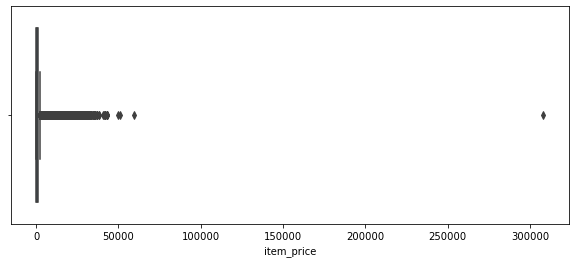

In [64]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train_df.item_price)

In [118]:
train_df=train_df[train_df['item_price']<100000]

In [13]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,cue
0,02.01.2013,0,59,22154,999.00,1.0,0
1,03.01.2013,0,25,2552,899.00,1.0,0
2,05.01.2013,0,25,2552,899.00,-1.0,0
3,06.01.2013,0,25,2554,1709.05,1.0,0
4,15.01.2013,0,25,2555,1099.00,1.0,0
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,0
2935845,09.10.2015,33,25,7460,299.00,1.0,0
2935846,14.10.2015,33,25,7459,349.00,1.0,0
2935847,22.10.2015,33,25,7440,299.00,1.0,0


<AxesSubplot:xlabel='item_cnt_day'>

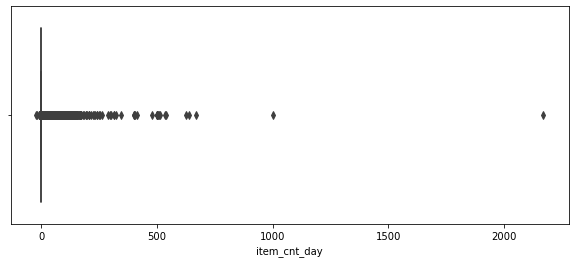

In [67]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train_df.item_cnt_day)

In [119]:
train_df=train_df[train_df['item_cnt_day']<1000]
train_df=train_df[train_df['item_cnt_day']>=0]
train_df=train_df[train_df['item_price']>= 0]

In [24]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,cue
0,02.01.2013,0,59,22154,999.00,1.0,0
1,03.01.2013,0,25,2552,899.00,1.0,0
3,06.01.2013,0,25,2554,1709.05,1.0,0
4,15.01.2013,0,25,2555,1099.00,1.0,0
5,10.01.2013,0,25,2564,349.00,1.0,0


In [25]:
test.head()

,ID,shop_id,item_id,date_block_num,cue
0,0,5,5037,34,1
1,1,5,5320,34,1
2,2,5,5233,34,1
3,3,5,5232,34,1
4,4,5,5268,34,1


In [26]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [29]:
itemc=pd.merge(item_cat,items,how='left',on='item_category_id')

In [31]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [33]:
itemc=itemc.drop(['item_category_name','item_name'],axis=1)

In [69]:
itemc

,item_category_id,item_id
0,0,5441
1,0,16255
2,0,16256
3,0,16257
4,1,5606
...,...,...
22165,83,22095
22166,83,22096
22167,83,22097
22168,83,22098


In [70]:
test_df=test_df.set_index('ID')

In [71]:
test_df=pd.merge(test_df,itemc,how='left',on='item_id')

In [72]:
test_df

,shop_id,item_id,date_block_num,cue,item_category_id
0,5,5037,34,1,19
1,5,5320,34,1,55
2,5,5233,34,1,19
3,5,5232,34,1,23
4,5,5268,34,1,20
...,...,...,...,...,...
214195,45,18454,34,1,55
214196,45,16188,34,1,64
214197,45,15757,34,1,55
214198,45,19648,34,1,40


In [120]:
train_df=pd.merge(train_df,itemc,how='left',on='item_id')

In [49]:
item_price=train[['item_id','item_price']]

In [84]:
itemp2=item_price.set_index('item_id')

In [102]:
len(set(test_df.item_id))

5100

In [95]:
test_df

,shop_id,item_id,date_block_num,cue,item_category_id
0,5,5037,34,1,19
1,5,5320,34,1,55
2,5,5233,34,1,19
3,5,5232,34,1,23
4,5,5268,34,1,20
...,...,...,...,...,...
214195,45,18454,34,1,55
214196,45,16188,34,1,64
214197,45,15757,34,1,55
214198,45,19648,34,1,40


In [121]:
train_df=train_df.drop(['date'],axis=1)

In [123]:
train_df1 =train_df.copy()

In [125]:
train_df1.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,cue,item_category_id
0,0,59,22154,999.00,1.0,0,37
1,0,25,2552,899.00,1.0,0,58
2,0,25,2554,1709.05,1.0,0,58
3,0,25,2555,1099.00,1.0,0,56
4,0,25,2564,349.00,1.0,0,59


In [126]:
train_df1.duplicated(['item_id'])

0          False
1          False
2          False
3          False
4          False
           ...  
2928484     True
2928485     True
2928486     True
2928487     True
2928488     True
Length: 2928489, dtype: bool

In [128]:
item_id=train_df1.drop_duplicates(['item_id'],keep='first')

In [133]:
item_price=item_id[['item_id','item_price']]

In [136]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              214200 non-null  int64
 1   shop_id         214200 non-null  int64
 2   item_id         214200 non-null  int64
 3   date_block_num  214200 non-null  int64
 4   cue             214200 non-null  int64
dtypes: int64(5)
memory usage: 8.2 MB


In [134]:
test_df1= pd.merge(test_df1,item_price,how='left',on='item_id')

In [137]:
test_df1.set_index('ID')

,shop_id,item_id,date_block_num,cue,item_price
ID,,,,,
0,5,5037,34,1,2599.0
1,5,5320,34,1,NaN
2,5,5233,34,1,1199.0
3,5,5232,34,1,599.5
4,5,5268,34,1,NaN
...,...,...,...,...,...
214195,45,18454,34,1,199.0
214196,45,16188,34,1,1223.0
214197,45,15757,34,1,199.0


In [139]:
test_df1['item_price'].isna().sum()

15246

In [144]:
test_df1['item_price'].fillna(value=test_df1['item_price'].median(),inplace=True)

In [152]:
test_df1=test_df1.reset_index()

In [154]:
test_df1=test_df1.drop(['ID'],axis=1)

In [158]:
test_df1=pd.merge(test_df1,itemc,how='left',on='item_id')

In [159]:
test_df1

,shop_id,item_id,date_block_num,cue,item_price,item_category_id
0,5,5037,34,1,2599.0,19
1,5,5320,34,1,549.0,55
2,5,5233,34,1,1199.0,19
3,5,5232,34,1,599.5,23
4,5,5268,34,1,549.0,20
...,...,...,...,...,...,...
214195,45,18454,34,1,199.0,55
214196,45,16188,34,1,1223.0,64
214197,45,15757,34,1,199.0,55
214198,45,19648,34,1,99.0,40


In [157]:
train_df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,cue,item_category_id
0,0,59,22154,999.00,1.0,0,37
1,0,25,2552,899.00,1.0,0,58
2,0,25,2554,1709.05,1.0,0,58
3,0,25,2555,1099.00,1.0,0,56
4,0,25,2564,349.00,1.0,0,59
...,...,...,...,...,...,...,...
2928484,33,25,7409,299.00,1.0,0,55
2928485,33,25,7460,299.00,1.0,0,55
2928486,33,25,7459,349.00,1.0,0,55
2928487,33,25,7440,299.00,1.0,0,57


In [160]:
train_df2=train_df.groupby(['shop_id','item_id','date_block_num'])['item_cnt_day'].agg([('item_cnt_month','sum')]).reset_index()

In [161]:
train_df2

,shop_id,item_id,date_block_num,item_cnt_month
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0
...,...,...,...,...
1608219,59,22164,27,2.0
1608220,59,22164,30,1.0
1608221,59,22167,9,1.0
1608222,59,22167,11,2.0


In [162]:
train_df3=pd.merge(train_df,train_df2,how='left',on=['shop_id','item_id','date_block_num'])

In [190]:
train_df3.drop(['item_cnt_day'],axis=1,inplace=True)

In [192]:
test_df1

,shop_id,item_id,date_block_num,cue,item_price,item_category_id
0,5,5037,34,1,2599.0,19
1,5,5320,34,1,549.0,55
2,5,5233,34,1,1199.0,19
3,5,5232,34,1,599.5,23
4,5,5268,34,1,549.0,20
...,...,...,...,...,...,...
214195,45,18454,34,1,199.0,55
214196,45,16188,34,1,1223.0,64
214197,45,15757,34,1,199.0,55
214198,45,19648,34,1,99.0,40


In [193]:
train_df3

,date_block_num,shop_id,item_id,item_price,cue,item_category_id,item_cnt_month
0,0,59,22154,999.00,0,37,1.0
1,0,25,2552,899.00,0,58,1.0
2,0,25,2554,1709.05,0,58,1.0
3,0,25,2555,1099.00,0,56,1.0
4,0,25,2564,349.00,0,59,1.0
...,...,...,...,...,...,...,...
2928484,33,25,7409,299.00,0,55,3.0
2928485,33,25,7460,299.00,0,55,3.0
2928486,33,25,7459,349.00,0,55,1.0
2928487,33,25,7440,299.00,0,57,1.0


In [195]:
df=pd.concat([train_df3,test_df1])

In [197]:
test_df1

,shop_id,item_id,date_block_num,cue,item_price,item_category_id
0,5,5037,34,1,2599.0,19
1,5,5320,34,1,549.0,55
2,5,5233,34,1,1199.0,19
3,5,5232,34,1,599.5,23
4,5,5268,34,1,549.0,20
...,...,...,...,...,...,...
214195,45,18454,34,1,199.0,55
214196,45,16188,34,1,1223.0,64
214197,45,15757,34,1,199.0,55
214198,45,19648,34,1,99.0,40


In [196]:
df

,date_block_num,shop_id,item_id,item_price,cue,item_category_id,item_cnt_month
0,0,59,22154,999.00,0,37,1.0
1,0,25,2552,899.00,0,58,1.0
2,0,25,2554,1709.05,0,58,1.0
3,0,25,2555,1099.00,0,56,1.0
4,0,25,2564,349.00,0,59,1.0
...,...,...,...,...,...,...,...
214195,34,45,18454,199.00,1,55,NaN
214196,34,45,16188,1223.00,1,64,NaN
214197,34,45,15757,199.00,1,55,NaN
214198,34,45,19648,99.00,1,40,NaN


In [198]:
df['item_cnt_month'].fillna(value=0,inplace=True)

In [200]:
df.isna().sum()

date_block_num      0
shop_id             0
item_id             0
item_price          0
cue                 0
item_category_id    0
item_cnt_month      0
dtype: int64

In [201]:
df.head()

,date_block_num,shop_id,item_id,item_price,cue,item_category_id,item_cnt_month
0,0,59,22154,999.00,0,37,1.0
1,0,25,2552,899.00,0,58,1.0
2,0,25,2554,1709.05,0,58,1.0
3,0,25,2555,1099.00,0,56,1.0
4,0,25,2564,349.00,0,59,1.0


In [202]:
sample=pd.read_csv('./Desktop/csv/sample.csv')
df_clust=pd.read_csv('./Desktop/csv/df_clust.csv')

In [204]:
sample=sample[['shop_id','shop_cluster']]

In [210]:
cat=df_clust[['item_category_id','km_cluster']]

In [216]:
cat.columns=['item_category_id','cat_cluster']

In [217]:
cat

,item_category_id,cat_cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
79,79,0
80,80,0
81,81,0
82,82,0


In [220]:
df2  =pd.merge(df,sample,how='left',on='shop_id')

In [222]:
df2 = pd.merge(df2,cat,how='left',on='item_category_id')

In [223]:
df2

,date_block_num,shop_id,item_id,item_price,cue,item_category_id,item_cnt_month,shop_cluster,cat_cluster
0,0,59,22154,999.00,0,37,1.0,0,2
1,0,25,2552,899.00,0,58,1.0,1,0
2,0,25,2554,1709.05,0,58,1.0,1,0
3,0,25,2555,1099.00,0,56,1.0,1,0
4,0,25,2564,349.00,0,59,1.0,1,0
...,...,...,...,...,...,...,...,...,...
3142684,34,45,18454,199.00,1,55,0.0,0,2
3142685,34,45,16188,1223.00,1,64,0.0,0,0
3142686,34,45,15757,199.00,1,55,0.0,0,2
3142687,34,45,19648,99.00,1,40,0.0,0,1


In [224]:
shops['city']=shops['shop_name'].str.split(' ').map(lambda x: x[0])

In [226]:
from sklearn.preprocessing import LabelEncoder   #도시는 같지만 다른 상점이기떄문에 values로 라벨인코딩함
lb = LabelEncoder()
lb.fit(list(shops['city'].values))
shops['city'] = lb.transform(list(shops['city'].values))

In [227]:
shops.drop(['shop_name'],axis=1,inplace=True) # 도시이름은 문자열로 드

In [229]:
df2 = pd.merge(df2,shops,how='left',on='shop_id')

In [243]:
df3 =df2.copy()

In [245]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142689 entries, 0 to 3142688
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date_block_num    int64  
 1   shop_id           int64  
 2   item_id           int64  
 3   item_price        float64
 4   cue               int64  
 5   item_category_id  int64  
 6   item_cnt_month    float64
 7   shop_cluster      int64  
 8   cat_cluster       int64  
 9   city              int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 251.8 MB


,date_block_num,shop_id,item_id,item_price,cue,item_category_id,item_cnt_month,shop_cluster,cat_cluster,city
0,0,59,22154,999.00,0,37,1.0,0,2,31
1,0,25,2552,899.00,0,58,1.0,1,0,14
2,0,25,2554,1709.05,0,58,1.0,1,0,14
3,0,25,2555,1099.00,0,56,1.0,1,0,14
4,0,25,2564,349.00,0,59,1.0,1,0,14
...,...,...,...,...,...,...,...,...,...,...
3142684,34,45,18454,199.00,1,55,0.0,0,2,21
3142685,34,45,16188,1223.00,1,64,0.0,0,0,21
3142686,34,45,15757,199.00,1,55,0.0,0,2,21
3142687,34,45,19648,99.00,1,40,0.0,0,1,21


In [247]:
df3.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'cue',
       'item_category_id', 'item_cnt_month', 'shop_cluster', 'cat_cluster',
       'city'],
      dtype='object')

In [248]:
X_num = df3[['item_price']]

In [267]:
X_num

,item_price
0,999.00
1,899.00
2,1709.05
3,1099.00
4,349.00
...,...
3142684,199.00
3142685,1223.00
3142686,199.00
3142687,99.00


In [250]:
X_cat= df3[['date_block_num', 'shop_id', 'item_id', 'cue',
       'item_category_id', 'item_cnt_month', 'shop_cluster', 'cat_cluster',
       'city']]

In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index)

In [264]:
X_scaled.columns=['item_price']

In [265]:
X = pd.concat([X_scaled,X_cat],axis=1)

In [266]:
X

,item_price,date_block_num,shop_id,item_id,cue,item_category_id,item_cnt_month,shop_cluster,cat_cluster,city
0,0.057572,0,59,22154,0,37,1.0,0,2,31
1,-0.000091,0,25,2552,0,58,1.0,1,0,14
2,0.467014,0,25,2554,0,58,1.0,1,0,14
3,0.115236,0,25,2555,0,56,1.0,1,0,14
4,-0.317242,0,25,2564,0,59,1.0,1,0,14
...,...,...,...,...,...,...,...,...,...,...
3142684,-0.403738,34,45,18454,1,55,0.0,0,2,21
3142685,0.186739,34,45,16188,1,64,0.0,0,0,21
3142686,-0.403738,34,45,15757,1,55,0.0,0,2,21
3142687,-0.461402,34,45,19648,1,40,0.0,0,1,21


In [268]:
X_train = X[X.date_block_num <33].drop(['item_cnt_month','cue'],axis=1)
Y_train = X[X.date_block_num <33]['item_cnt_month']
X_valid = X[X.date_block_num ==33].drop(['item_cnt_month','cue'],axis=1)
Y_valid = X[X.date_block_num ==33]['item_cnt_month']
X_test = X[X.date_block_num ==34].drop(['item_cnt_month','cue'],axis=1)

In [269]:
from xgboost import XGBRegressor

In [271]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300,
    colsample_bytree=0.8,
    subsample=0.8,
    eta=0.3,
    seed=42)

model.fit(
    X_train,
    Y_train,
    eval_metric="rmse",
    eval_set=[(X_train, Y_train),(X_valid, Y_valid)],
    verbose=True,
    early_stopping_rounds = 20)

[0]	validation_0-rmse:24.91834	validation_1-rmse:16.24749
[1]	validation_0-rmse:21.22747	validation_1-rmse:14.90202
[2]	validation_0-rmse:18.91739	validation_1-rmse:15.13716
[3]	validation_0-rmse:17.65217	validation_1-rmse:14.13591
[4]	validation_0-rmse:16.97747	validation_1-rmse:13.96953
[5]	validation_0-rmse:16.34596	validation_1-rmse:13.81222
[6]	validation_0-rmse:15.83348	validation_1-rmse:14.68222
[7]	validation_0-rmse:15.42164	validation_1-rmse:15.36114
[8]	validation_0-rmse:15.16296	validation_1-rmse:15.61192
[9]	validation_0-rmse:14.91275	validation_1-rmse:16.00761
[10]	validation_0-rmse:14.61598	validation_1-rmse:15.96409
[11]	validation_0-rmse:14.42540	validation_1-rmse:15.81687
[12]	validation_0-rmse:14.30701	validation_1-rmse:15.45517
[13]	validation_0-rmse:14.20170	validation_1-rmse:15.43305
[14]	validation_0-rmse:14.06891	validation_1-rmse:16.00618
[15]	validation_0-rmse:14.02559	validation_1-rmse:16.02882
[16]	validation_0-rmse:13.87802	validation_1-rmse:16.02172
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=300, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [272]:
Y_pred= model.predict(X_valid).clip(0,20)
Y_test= model.predict(X_test).clip(0,20)




In [274]:
sub2= pd.DataFrame(Y_test)

In [276]:
sub2.columns = ['item_cnt_month']

In [277]:
sub2

,item_cnt_month
0,9.263609
1,1.849948
2,3.696122
3,4.400439
4,3.926696
...,...
214195,1.359006
214196,1.925817
214197,1.359006
214198,1.727901


In [279]:
submission = pd.DataFrame({
    "ID":test.index,
    "item_cnt_month": Y_test
})

In [281]:
submission.to_csv('./Desktop/csv/sub2.csv',index=False)